In [1]:
import pandas as p
import numpy as n

In [2]:
df=p.read_csv('Credit card Approval.csv')
print(df.shape)

(10000, 12)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 869.2+ KB


In [4]:
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


In [5]:
df.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,496819.831400,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211
std,287391.314157,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243
min,244.000000,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052
25%,245172.500000,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424
50%,495734.000000,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841
75%,745475.250000,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,1004.497869,30.131214,1.000000


In [6]:
df.count()

customer_id          10000
demographic_slice    10000
country_reg          10000
ad_exp               10000
est_income           10000
hold_bal             10000
pref_cust_prob       10000
imp_cscore           10000
RiskScore            10000
imp_crediteval       10000
axio_score           10000
card_offer           10000
dtype: int64

In [7]:
df.isnull().sum()

customer_id          0
demographic_slice    0
country_reg          0
ad_exp               0
est_income           0
hold_bal             0
pref_cust_prob       0
imp_cscore           0
RiskScore            0
imp_crediteval       0
axio_score           0
card_offer           0
dtype: int64

# Univariate Analysis

In [8]:
df.skew(axis=0)

customer_id       0.019750
est_income       -0.535274
hold_bal          1.015113
pref_cust_prob    0.904168
imp_cscore        0.231556
RiskScore         0.023744
imp_crediteval    0.092559
axio_score        0.451390
card_offer        1.927062
dtype: float64

In [9]:
import seaborn as sb
import matplotlib.pyplot as pl
%matplotlib inline

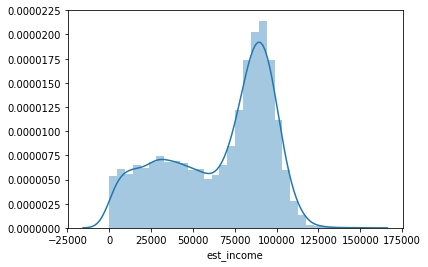

In [10]:
sb.distplot(df['est_income'])
pl.show()

0.6251649317995985


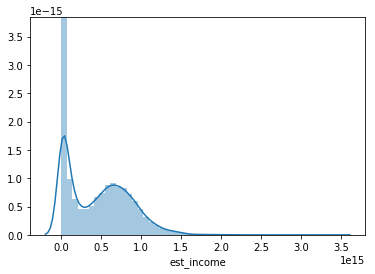

In [11]:
sb.distplot((df['est_income'])**3)
print((df['est_income']**3).skew(axis=0))
pl.show()

0.056566074848827815


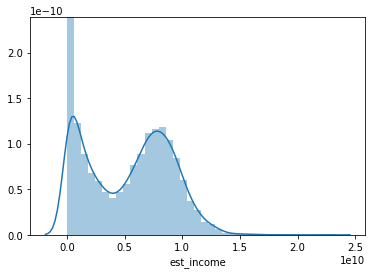

In [12]:
df['est_income']=(df['est_income']**2)
print((df['est_income']).skew(axis=0))
sb.distplot(df['est_income'])
pl.show()

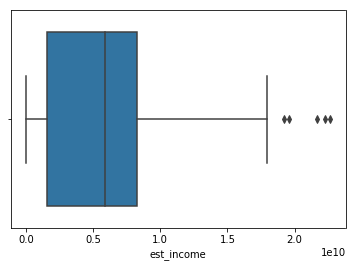

In [13]:
sb.boxplot(df['est_income'])
pl.show()

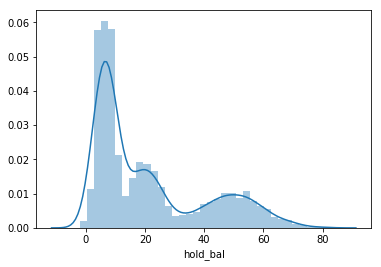

In [14]:
sb.distplot(df['hold_bal'])
pl.show()

In [15]:
df['hold_bal']=n.log(df['hold_bal'])
df.loc[(df.hold_bal == float('inf')) | (df.hold_bal == float('-inf')), 'hold_bal'] = n.nan
df['hold_bal'].fillna(n.mean(df['hold_bal']),inplace=True)

print((df['hold_bal']).skew(axis=0))

-0.08323215218111003


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


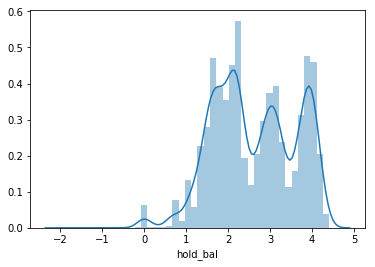

In [16]:
sb.distplot(df['hold_bal'])
pl.show()

In [17]:
#df['hold_bal']=n.sqrt(df['hold_bal'])
#df['hold_bal'].fillna(n.mean(df['hold_bal']),inplace=True)
#print((df['hold_bal']).skew(axis=0))

#sb.distplot(df['hold_bal'])
#pl.show()

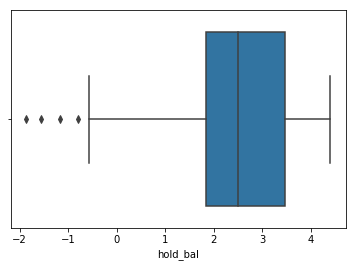

In [18]:
sb.boxplot(df['hold_bal'])
pl.show()

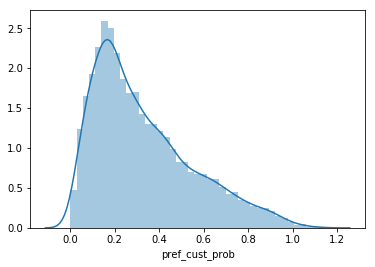

In [19]:
sb.distplot(df['pref_cust_prob'])
pl.show()

In [20]:
#df['pref_cust_prob']=n.log(df['pref_cust_prob'])
#sb.distplot(df['pref_cust_prob'])
#print(df['pref_cust_prob'].skew(axis=0))
#pl.show()

0.24487668783970917


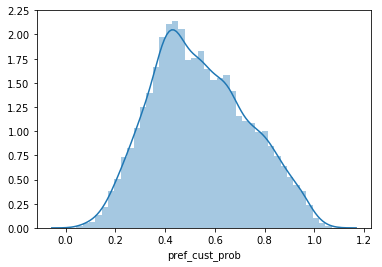

In [21]:
df['pref_cust_prob']=n.sqrt(df['pref_cust_prob'])
print((df['pref_cust_prob']).skew(axis=0))
sb.distplot(df['pref_cust_prob'])

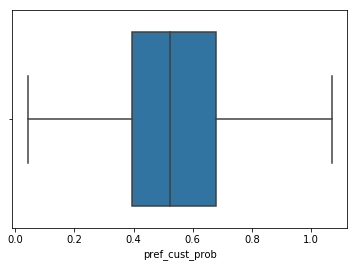

In [22]:
sb.boxplot(df['pref_cust_prob'])
pl.show()

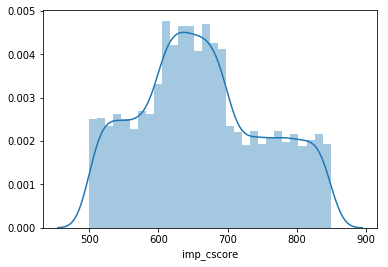

In [23]:
sb.distplot(df['imp_cscore'])
pl.show()

0.11203877217994881


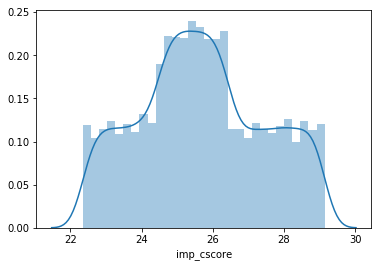

In [24]:
sb.distplot(n.sqrt(df['imp_cscore']))
print((n.sqrt(df['imp_cscore'])).skew(axis=0))
pl.show()

-0.009432715044892107


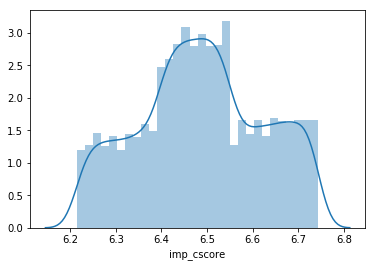

In [25]:
df['imp_cscore']=n.log(df['imp_cscore'])
print((df['imp_cscore']).skew(axis=0))
sb.distplot((df['imp_cscore']))
pl.show()

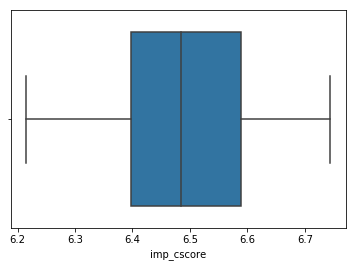

In [26]:
sb.boxplot(df['imp_cscore'])
pl.show()

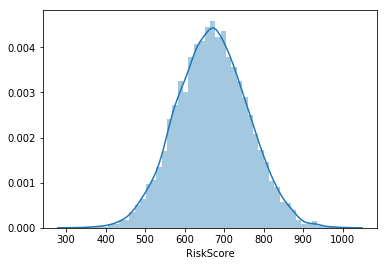

In [27]:
sb.distplot(df['RiskScore'])
pl.show()

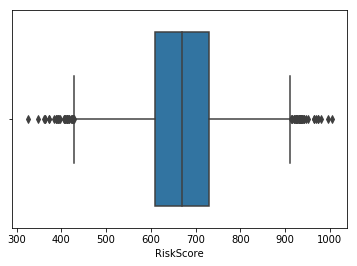

In [28]:
sb.boxplot(df['RiskScore'])
pl.show()

0.09255868507235189


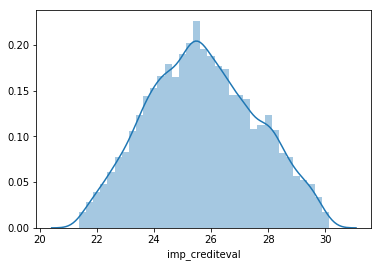

In [29]:
sb.distplot(df['imp_crediteval'])
print((df['imp_crediteval']).skew(axis=0))
pl.show()

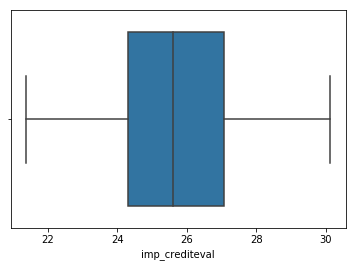

In [30]:
sb.boxplot(df['imp_crediteval'])
pl.show()

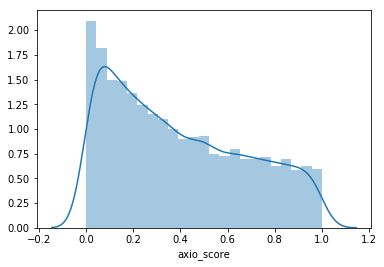

In [31]:
sb.distplot(df['axio_score'])
pl.show()

In [32]:
#df['axio_score']=n.log(df['axio_score'])
#df['axio_score'].fillna(n.mean(df['axio_score']),inplace=True)
#print((df['axio_score']).skew(axis=0))
#sb.distplot(df['axio_score'])
#pl.show()

In [33]:
df['axio_score']=n.sqrt(df['axio_score'])
df['axio_score'].fillna(n.mean(df['axio_score']),inplace=True)
print((df['axio_score']).skew(axis=0))

-0.14061423775386978


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


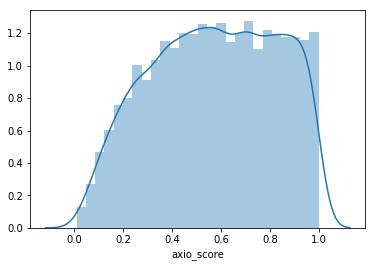

In [34]:
sb.distplot(df['axio_score'])
pl.show()

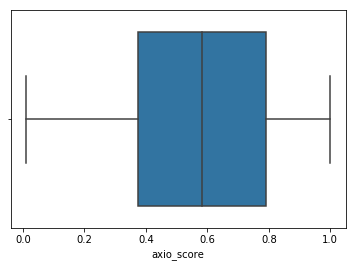

In [35]:
sb.boxplot(df['axio_score'])
pl.show()

## result after removing outleirs

In [36]:
df.skew(axis=0)

customer_id       0.019750
est_income        0.056566
hold_bal         -0.083232
pref_cust_prob    0.244877
imp_cscore       -0.009433
RiskScore         0.023744
imp_crediteval    0.092559
axio_score       -0.140614
card_offer        1.927062
dtype: float64

## Outliers Removal

## Est_income

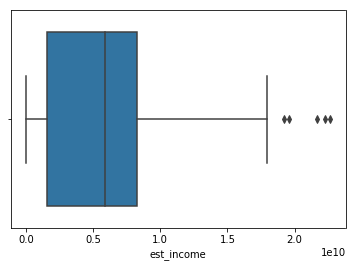

In [37]:
sb.boxplot(df['est_income'])
pl.show()

In [38]:
q1,q3=n.percentile(df['est_income'],[25,75])
IQR=q3-q1
UB=q3 + 1.5*IQR
LB=q1 - 1.5*IQR

median = n.median(df['est_income'])

In [39]:
count=0
for i in range (len(df['est_income'])):
    if (df.iloc[i]['est_income']>UB) or (df.iloc[i]['est_income']<LB):
        count=count+1
print((count/len(df['est_income']))*100)

0.05


## 'hold_bal'

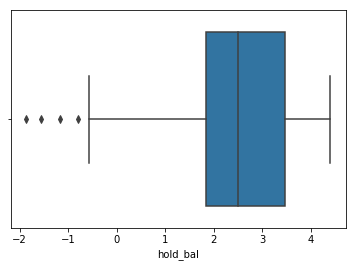

In [40]:
sb.boxplot(df['hold_bal'])
pl.show()

In [41]:
q1,q3=n.percentile(df['hold_bal'],[25,75])
IQR=q3-q1
UB=q3 + 1.5*IQR
LB=q1 - 1.5*IQR

median = n.median(df['hold_bal'])

In [42]:
count=0
for i in range (len(df['hold_bal'])):
    if (df.iloc[i]['hold_bal']>UB) or (df.iloc[i]['hold_bal']<LB):
        count=count+1
print((count/len(df['hold_bal']))*100)

0.04


## 'RiskScore'

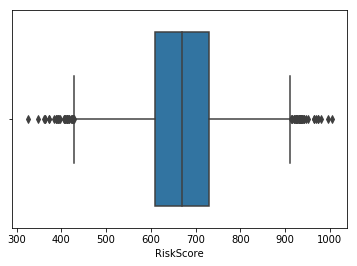

In [43]:
sb.boxplot(df['RiskScore'])
pl.show()

In [44]:
q1,q3=n.percentile(df['RiskScore'],[25,75])
IQR=q3-q1
UB=q3 + 1.5*IQR
LB=q1 - 1.5*IQR

median = n.median(df['RiskScore'])

In [45]:
count=0
for i in range (len(df['RiskScore'])):
    if (df.iloc[i]['RiskScore']>UB) or (df.iloc[i]['RiskScore']<LB):
        count=count+1
print((count/len(df['RiskScore']))*100)

0.74


# Output Feature Conversion

In [46]:
approval=df['card_offer'].astype(int)
df.drop(['card_offer'],axis=1,inplace=True)
df['approval']=approval
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,approval
0,713782,AX03efs,W,N,1.116088e+09,1.098612,0.728775,6.428105,503.249027,23.977827,0.370525,0
1,515901,AX03efs,E,N,3.971066e+08,3.008546,0.545379,6.267201,820.108146,22.986398,0.228612,0
2,95166,AX03efs,W,Y,2.623742e+09,1.386294,0.135879,6.406880,586.605795,24.939219,0.672335,0
3,425557,AX03efs,E,Y,4.517397e+09,2.926041,0.298904,6.371612,634.701982,24.841147,0.751411,0
4,624581,AX03efs,W,N,4.037424e+08,1.386294,0.308136,6.340359,631.949979,24.679363,0.957760,0


## Numeric conversion of catagorical Features

In [47]:
#This part is written to convert the catgorical value into numerical value

from sklearn.preprocessing import LabelEncoder as LE

df['dg slice']=LE().fit_transform(df['demographic_slice'])
df['country']=LE().fit_transform(df['country_reg'])
df['ad exp']=LE().fit_transform(df['ad_exp'])

In [48]:
#this cell is created to discard the columns contained catagorical values

df.drop(['demographic_slice','country_reg','ad_exp'],axis=1,inplace=True)
df.head()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,approval,dg slice,country,ad exp
0,713782,1.116088e+09,1.098612,0.728775,6.428105,503.249027,23.977827,0.370525,0,0,1,0
1,515901,3.971066e+08,3.008546,0.545379,6.267201,820.108146,22.986398,0.228612,0,0,0,0
2,95166,2.623742e+09,1.386294,0.135879,6.406880,586.605795,24.939219,0.672335,0,0,1,1
3,425557,4.517397e+09,2.926041,0.298904,6.371612,634.701982,24.841147,0.751411,0,0,0,1
4,624581,4.037424e+08,1.386294,0.308136,6.340359,631.949979,24.679363,0.957760,0,0,1,0


In [49]:
#this cell is created to devise the columns into predictor and predicted variables

x=df.drop(['approval'],axis=1)
y=df['approval']

# Bivariate Analysis

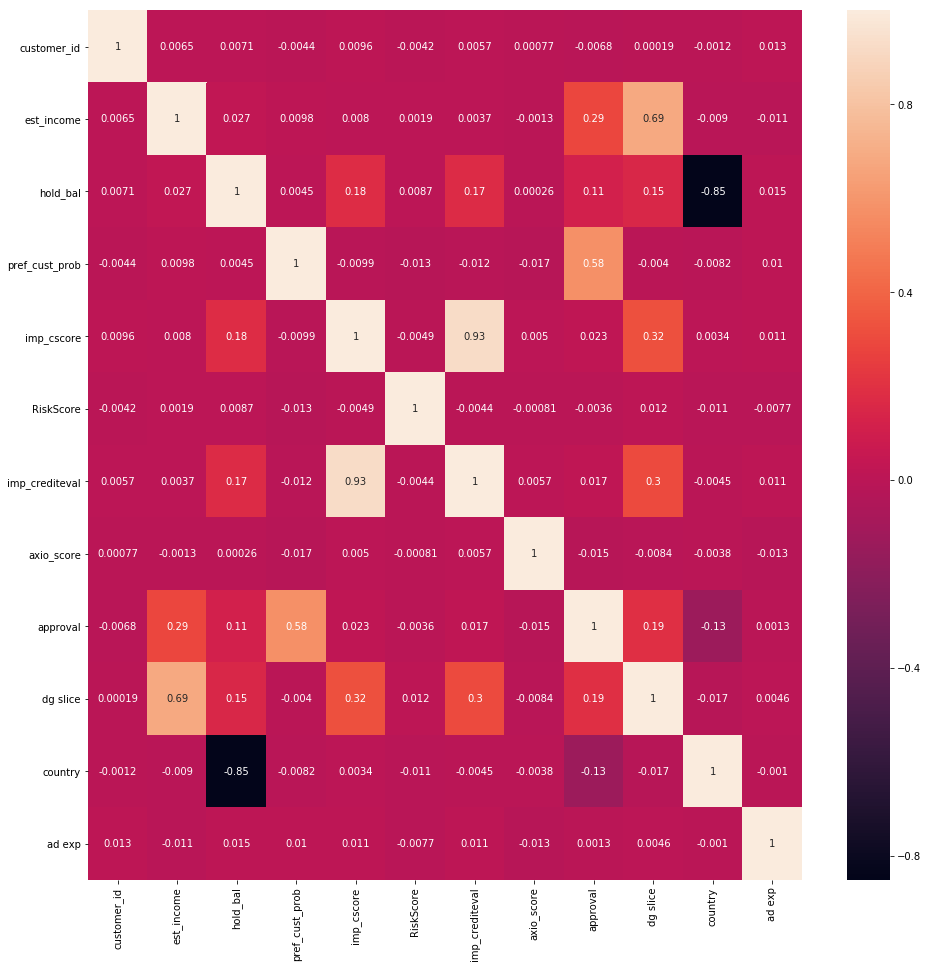

In [50]:
pl.figure(figsize=(16,16))
sb.heatmap(df.corr(),annot=True)
pl.show()

In [51]:
df=df.drop(['imp_crediteval'],axis=1)
df=df.drop(['country'],axis=1)
df=df.drop(['dg slice'],axis=1)

In [52]:
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as LG
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GB

from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rcc
from sklearn.metrics import precision_score as prr
from sklearn.metrics import classification_report as cr

# Model Creation without upsampling or downsampling

In [53]:
#this cell is created to devise the columns into predictor and predicted variables

x=df.drop(['approval'],axis=1)
y=df['approval']

In [54]:
#this cell is created to split the dataset into training and testing set

train_x,test_x,train_y,test_y=tts(x,y,test_size=0.3,random_state=1)

## Logistic Regression (no resample)

In [55]:
#this cell is created to split create the model

model=LG()
model.fit(train_x,train_y)
predicted_approval=model.predict(test_x)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
m1=cm(test_y,predicted_approval)
print(m1)

lg0=[acc(test_y,predicted_approval)]
lg0.append(prr(test_y,predicted_approval))
lg0.append(rcc(test_y,predicted_approval))
lg0.append(m1[0][0]/(m1[0][0]+m1[0][1])) #TPR
lg0.append(m1[1][1]/(m1[1][1]+m1[1][0])) #TNR
lg0.append(m1[1][0]/(m1[1][1]+m1[1][0])) #FPR
lg0.append(m1[0][1]/(m1[0][0]+m1[0][1])) #FNR

print(cr(test_y,predicted_approval))

[[2535    0]
 [ 465    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2535
           1       0.00      0.00      0.00       465

   micro avg       0.84      0.84      0.84      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.71      0.84      0.77      3000



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Imballanced output feature

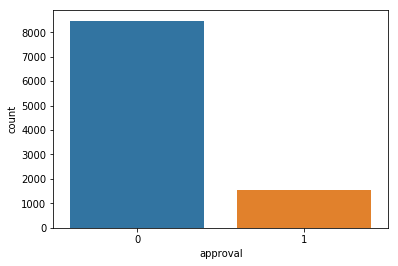

In [57]:
sb.countplot(df['approval'])
pl.show()

## Imballanced output feature in training dataset

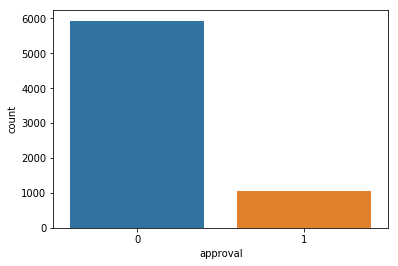

In [58]:
sb.countplot(train_y)
pl.show()

## Imballanced output feature in testing dataset

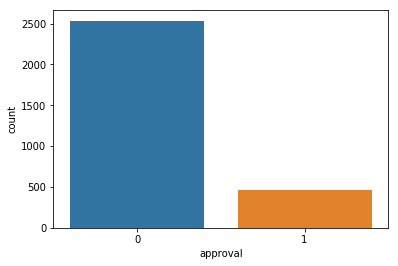

In [59]:
sb.countplot(test_y)
pl.show()

## Biased prediction

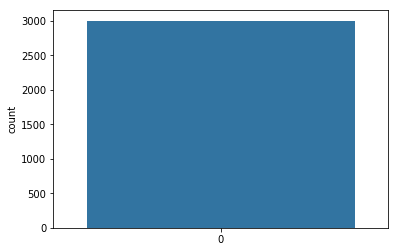

In [60]:
sb.countplot(predicted_approval)
pl.show()

In [61]:
df['approval'].value_counts()

0    8469
1    1531
Name: approval, dtype: int64

## Decision tree (no resample)

In [62]:
entropy=dtc(criterion='entropy',random_state=1)
entropy.fit(train_x,train_y)
predict_y=entropy.predict(test_x)
m2=cm(test_y,predict_y)
print(m2)

lt0=[acc(test_y,predict_y)]
lt0.append(prr(test_y,predict_y))
lt0.append(rcc(test_y,predict_y))
lt0.append(m2[0][0]/(m2[0][0]+m2[0][1])) #TPR
lt0.append(m2[1][1]/(m2[1][1]+m2[1][0])) #TNR
lt0.append(m2[1][0]/(m2[1][1]+m2[1][0])) #FPR
lt0.append(m2[0][1]/(m2[0][0]+m2[0][1])) #FNR


print(acc(test_y,predict_y))
print(cr(test_y,predict_y))

[[2487   48]
 [  65  400]]
0.9623333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2535
           1       0.89      0.86      0.88       465

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.96      0.96      0.96      3000



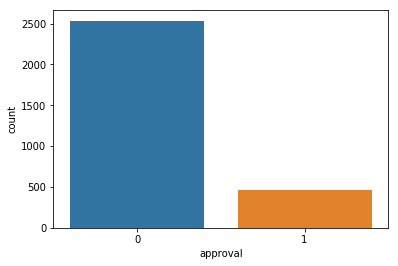

In [63]:
sb.countplot(test_y)

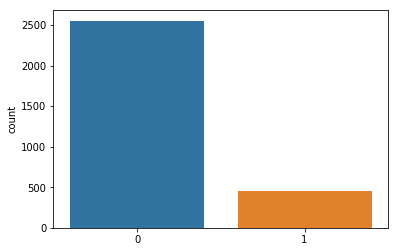

In [64]:
sb.countplot(predict_y)

# K neighbors (no resample)

In [65]:
train_x=SC().fit_transform(train_x)
test_x=SC().fit_transform(test_x)

classifier=KNC(n_neighbors=83,p=2,metric='euclidean')
classifier.fit(train_x,train_y)
y_pred=classifier.predict(test_x)
m3=cm(test_y,y_pred)
print(m3)


ln0=[acc(test_y,y_pred)]
ln0.append(prr(test_y,y_pred))
ln0.append(rcc(test_y,y_pred))
ln0.append(m3[0][0]/(m3[0][0]+m3[0][1])) #TPR
ln0.append(m3[1][1]/(m3[1][1]+m3[1][0])) #TNR
ln0.append(m3[1][0]/(m3[1][1]+m3[1][0])) #FPR
ln0.append(m3[0][1]/(m3[0][0]+m3[0][1])) #FNR


print(acc(test_y,y_pred))
print(cr(test_y,y_pred))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[2527    8]
 [ 270  195]]
0.9073333333333333
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2535
           1       0.96      0.42      0.58       465

   micro avg       0.91      0.91      0.91      3000
   macro avg       0.93      0.71      0.77      3000
weighted avg       0.91      0.91      0.89      3000



## Naive Bayes (no resample)

In [66]:
model_b=GB().fit(train_x,train_y)
predict_b=model_b.predict(test_x)
m4=cm(test_y,predict_b)
print(m4)

lb0=[acc(test_y,predict_b)]
lb0.append(prr(test_y,predict_b))
lb0.append(rcc(test_y,predict_b))
lb0.append(m4[0][0]/(m4[0][0]+m4[0][1])) #TPR
lb0.append(m4[1][1]/(m4[1][1]+m4[1][0])) #TNR
lb0.append(m4[1][0]/(m4[1][1]+m4[1][0])) #FPR
lb0.append(m4[0][1]/(m4[0][0]+m4[0][1])) #FNR


print(acc(test_y,predict_b))
print(cr(test_y,predict_b))

[[2509   26]
 [ 145  320]]
0.943
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2535
           1       0.92      0.69      0.79       465

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.94      0.84      0.88      3000
weighted avg       0.94      0.94      0.94      3000



# Model Creation atter upsampling or downsampling

# k=8 (All features)

## upsampling

In [67]:
from sklearn.utils import resample as rs

print(df['approval'].value_counts())
major=df[df.approval==0]
minor=df[df.approval==1]

0    8469
1    1531
Name: approval, dtype: int64


In [68]:
upsampled=rs(minor,replace=True,n_samples=8466,random_state=1)
upsampled=p.concat([upsampled,major])
upsampled['approval'].value_counts()

y=upsampled['approval']
x=upsampled.drop(['approval'],axis=1)
Xtrn,Xtst,Ytrn,Ytst=tts(x,y,test_size=0.3,random_state=1)

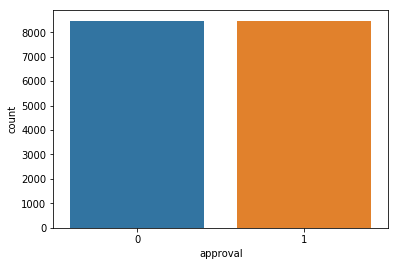

In [69]:
sb.countplot(upsampled['approval'])
pl.show()

In [70]:
upsampled['approval'].value_counts()

0    8469
1    8466
Name: approval, dtype: int64

## Logistic Regression (Up sampling)

In [71]:
US_model_r=LG().fit(Xtrn,Ytrn)
USpredict_r=US_model_r.predict(Xtst)
m8lU=cm(Ytst,USpredict_r)
print(m8lU)

lg8U=[acc(Ytst,USpredict_r)]
lg8U.append(prr(Ytst,USpredict_r))
lg8U.append(rcc(Ytst,USpredict_r))
lg8U.append(m8lU[0][0]/(m8lU[0][0]+m8lU[0][1])) #TPR
lg8U.append(m8lU[1][1]/(m8lU[1][1]+m8lU[1][0])) #TNR
lg8U.append(m8lU[1][0]/(m8lU[1][1]+m8lU[1][0])) #FPR
lg8U.append(m8lU[0][1]/(m8lU[0][0]+m8lU[0][1])) #FNR

print(acc(USpredict_r,Ytst))
print(cr(USpredict_r,Ytst))

[[ 787 1785]
 [ 130 2379]]
0.6231056878567212
              precision    recall  f1-score   support

           0       0.31      0.86      0.45       917
           1       0.95      0.57      0.71      4164

   micro avg       0.62      0.62      0.62      5081
   macro avg       0.63      0.71      0.58      5081
weighted avg       0.83      0.62      0.67      5081



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


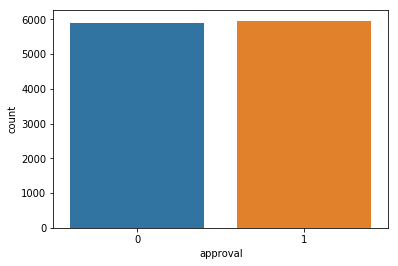

In [72]:
sb.countplot(Ytrn)

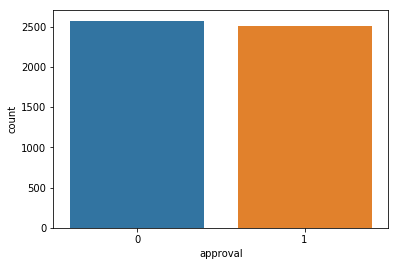

In [73]:
sb.countplot(Ytst)

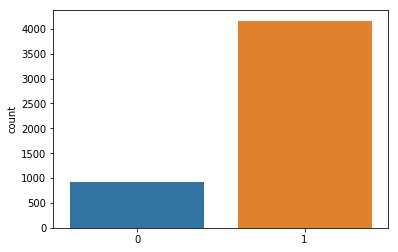

In [74]:
sb.countplot(USpredict_r)

## Decision Tree (Up sampling)

In [75]:
US_model_t=dtc(criterion='entropy',random_state=1)
US_model_t.fit(Xtrn,Ytrn)
USpredict_t=US_model_t.predict(Xtst)
m8tU=cm(Ytst,USpredict_t)
print(m8tU)

lt8U=[acc(Ytst,USpredict_t)]
lt8U.append(prr(Ytst,USpredict_t))
lt8U.append(rcc(Ytst,USpredict_t))
lt8U.append(m8tU[0][0]/(m8tU[0][0]+m8tU[0][1])) #TPR
lt8U.append(m8tU[1][1]/(m8tU[1][1]+m8tU[1][0])) #TNR
lt8U.append(m8tU[1][0]/(m8tU[1][1]+m8tU[1][0])) #FPR
lt8U.append(m8tU[0][1]/(m8tU[0][0]+m8tU[0][1])) #FNR


print(acc(USpredict_t,Ytst))
print(cr(USpredict_t,Ytst))

[[2515   57]
 [   6 2503]]
0.9876008659712655
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2521
           1       1.00      0.98      0.99      2560

   micro avg       0.99      0.99      0.99      5081
   macro avg       0.99      0.99      0.99      5081
weighted avg       0.99      0.99      0.99      5081



## After resampling output feature in testing dataset

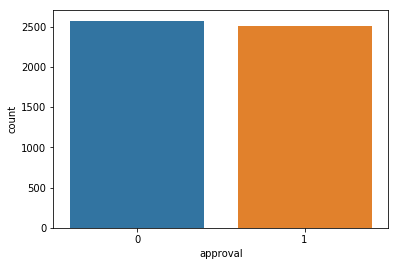

In [76]:
sb.countplot(Ytst)

## After resampling predicted output feature

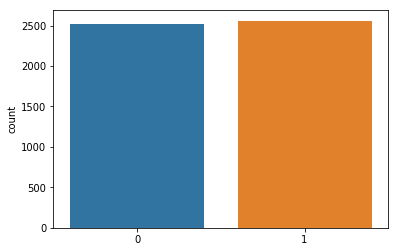

In [77]:
sb.countplot(USpredict_t)

## K neighbors (Up sampling)

In [78]:
Xtrn=SC().fit_transform(Xtrn)
Xtst=SC().fit_transform(Xtst)

US_model_n=KNC(n_neighbors=83,p=2,metric='euclidean')
US_model_n.fit(Xtrn,Ytrn)
US_predict_n=US_model_n.predict(Xtst)
m8nU=cm(Ytst,US_predict_n)
print(m8nU)

ln8U=[acc(Ytst,US_predict_n)]
ln8U.append(prr(Ytst,US_predict_n))
ln8U.append(rcc(Ytst,US_predict_n))
ln8U.append(m8nU[0][0]/(m8nU[0][0]+m8nU[0][1])) #TPR
ln8U.append(m8nU[1][1]/(m8nU[1][1]+m8nU[1][0])) #TNR
ln8U.append(m8nU[1][0]/(m8nU[1][1]+m8nU[1][0])) #FPR
ln8U.append(m8nU[0][1]/(m8nU[0][0]+m8nU[0][1])) #FNR


print(acc(Ytst,US_predict_n))
print(cr(Ytst,US_predict_n))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[2188  384]
 [  13 2496]]
0.9218657744538477
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2572
           1       0.87      0.99      0.93      2509

   micro avg       0.92      0.92      0.92      5081
   macro avg       0.93      0.92      0.92      5081
weighted avg       0.93      0.92      0.92      5081



## Naive Bayes (Up sampling)

In [79]:
from sklearn.naive_bayes import GaussianNB as GB
US_model_b=GB().fit(Xtrn,Ytrn)
US_predict_b=US_model_b.predict(Xtst)

m8bU=cm(Ytst,US_predict_b)
print(m8bU)

lb8U=[acc(Ytst,US_predict_b)]
lb8U.append(prr(Ytst,US_predict_b))
lb8U.append(rcc(Ytst,US_predict_b))
lb8U.append(m8bU[0][0]/(m8bU[0][0]+m8bU[0][1])) #TPR
lb8U.append(m8bU[1][1]/(m8bU[1][1]+m8bU[1][0])) #TNR
lb8U.append(m8bU[1][0]/(m8bU[1][1]+m8bU[1][0])) #FPR
lb8U.append(m8bU[0][1]/(m8bU[0][0]+m8bU[0][1])) #FNR


print(acc(Ytst,US_predict_b))
print(cr(Ytst,US_predict_b))

[[2286  286]
 [  86 2423]]
0.9267860657350915
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2572
           1       0.89      0.97      0.93      2509

   micro avg       0.93      0.93      0.93      5081
   macro avg       0.93      0.93      0.93      5081
weighted avg       0.93      0.93      0.93      5081



## downsampling

In [80]:
downsampled=rs(major,replace=False,n_samples=1531,random_state=1)
downsampled=p.concat([downsampled,minor])
downsampled['approval'].value_counts()

y=downsampled['approval']
x=downsampled.drop(['approval'],axis=1)
Xtrn,Xtst,Ytrn,Ytst=tts(x,y,test_size=0.3,random_state=1)

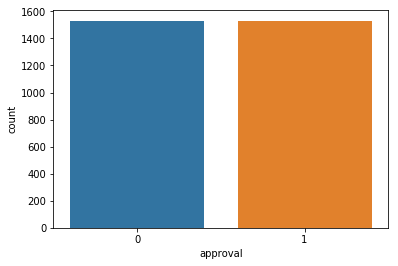

In [81]:
sb.countplot(downsampled['approval'])
pl.show()

In [82]:
downsampled['approval'].value_counts()

1    1531
0    1531
Name: approval, dtype: int64

## Logistic Regression (Down Sampling)

In [83]:
DS_model_r=LG().fit(Xtrn,Ytrn)
DSpredict_r=DS_model_r.predict(Xtst)

m8lD=cm(Ytst,DSpredict_r)
print(m8lD)

lg8D=[acc(Ytst,DSpredict_r)]
lg8D.append(prr(Ytst,DSpredict_r))
lg8D.append(rcc(Ytst,DSpredict_r))
lg8D.append(m8lD[0][0]/(m8lD[0][0]+m8lD[0][1])) #TPR
lg8D.append(m8lD[1][1]/(m8lD[1][1]+m8lD[1][0])) #TNR
lg8D.append(m8lD[1][0]/(m8lD[1][1]+m8lD[1][0])) #FPR
lg8D.append(m8lD[0][1]/(m8lD[0][0]+m8lD[0][1])) #FNR


print(acc(Ytst,DSpredict_r))
print(cr(Ytst,DSpredict_r))

[[162 309]
 [ 32 416]]
0.6289445048966268
              precision    recall  f1-score   support

           0       0.84      0.34      0.49       471
           1       0.57      0.93      0.71       448

   micro avg       0.63      0.63      0.63       919
   macro avg       0.70      0.64      0.60       919
weighted avg       0.71      0.63      0.60       919



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree (Down Sampling)

In [84]:
DS_model_t=dtc(criterion='entropy',random_state=1)
DS_model_t.fit(Xtrn,Ytrn)
DSpredict_t=DS_model_t.predict(Xtst)

m8tD=cm(Ytst,DSpredict_t)
print(m8tD)

lt8D=[acc(Ytst,DSpredict_t)]
lt8D.append(prr(Ytst,DSpredict_t))
lt8D.append(rcc(Ytst,DSpredict_t))
lt8D.append(m8tD[0][0]/(m8tD[0][0]+m8tD[0][1])) #TPR
lt8D.append(m8tD[1][1]/(m8tD[1][1]+m8tD[1][0])) #TNR
lt8D.append(m8tD[1][0]/(m8tD[1][1]+m8tD[1][0])) #FPR
lt8D.append(m8tD[0][1]/(m8tD[0][0]+m8tD[0][1])) #FNR


print(acc(Ytst,DSpredict_t))
print(cr(Ytst,DSpredict_t)) 

[[446  25]
 [ 15 433]]
0.956474428726877
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       471
           1       0.95      0.97      0.96       448

   micro avg       0.96      0.96      0.96       919
   macro avg       0.96      0.96      0.96       919
weighted avg       0.96      0.96      0.96       919



## K neighbors (Down Sampling)

In [85]:
Xtrn=SC().fit_transform(Xtrn)
Xtst=SC().fit_transform(Xtst)

DS_model_n=KNC(n_neighbors=83,p=2,metric='euclidean')
DS_model_n.fit(Xtrn,Ytrn)
DS_predict_n=DS_model_n.predict(Xtst)
m8nD=cm(Ytst,DS_predict_n)
print(m8nD)

ln8D=[acc(Ytst,DS_predict_n)]
ln8D.append(prr(Ytst,DS_predict_n))
ln8D.append(rcc(Ytst,DS_predict_n))
ln8D.append(m8nD[0][0]/(m8nD[0][0]+m8nD[0][1])) #TPR
ln8D.append(m8nD[1][1]/(m8nD[1][1]+m8nD[1][0])) #TNR
ln8D.append(m8nD[1][0]/(m8nD[1][1]+m8nD[1][0])) #FPR
ln8D.append(m8nD[0][1]/(m8nD[0][0]+m8nD[0][1])) #FNR


print(acc(Ytst,DS_predict_n))
print(cr(Ytst,DS_predict_n))

[[373  98]
 [  0 448]]
0.8933623503808488
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       471
           1       0.82      1.00      0.90       448

   micro avg       0.89      0.89      0.89       919
   macro avg       0.91      0.90      0.89       919
weighted avg       0.91      0.89      0.89       919



C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Naive Bayes (Down Sampling)

In [86]:
DS_model_b=GB().fit(Xtrn,Ytrn)
DS_predict_b=DS_model_b.predict(Xtst)
m8bD=cm(Ytst,DS_predict_b)
print(m8bD)

lb8D=[acc(Ytst,DS_predict_b)]
lb8D.append(prr(Ytst,DS_predict_b))
lb8D.append(rcc(Ytst,DS_predict_b))
lb8D.append(m8bD[0][0]/(m8bD[0][0]+m8bD[0][1])) #TPR
lb8D.append(m8bD[1][1]/(m8bD[1][1]+m8bD[1][0])) #TNR
lb8D.append(m8bD[1][0]/(m8bD[1][1]+m8bD[1][0])) #FPR
lb8D.append(m8bD[0][1]/(m8bD[0][0]+m8bD[0][1])) #FNR


print(acc(Ytst,DS_predict_b))
print(cr(Ytst,DS_predict_b))

[[410  61]
 [ 10 438]]
0.9227421109902068
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       471
           1       0.88      0.98      0.93       448

   micro avg       0.92      0.92      0.92       919
   macro avg       0.93      0.92      0.92       919
weighted avg       0.93      0.92      0.92       919



# Resampling Evaluation

In [87]:
rw=['accuracy','Precission','Recall','TP rate','TN rate','FP rate','FN rate']
col=['withou Resampling','Upsampling','downsampling']

df_LG=p.DataFrame(columns=col,index=rw)
df_DCT=df_KN=df_NB=df_LG

In [88]:
df_LG['withou Resampling']=lg0
df_LG['Upsampling']=lg8U
df_LG['downsampling']=lg8D
print(df_LG)

            withou Resampling  Upsampling  downsampling
accuracy                0.845    0.623106      0.628945
Precission              0.000    0.571326      0.573793
Recall                  0.000    0.948187      0.928571
TP rate                 1.000    0.305988      0.343949
TN rate                 0.000    0.948187      0.928571
FP rate                 1.000    0.051813      0.071429
FN rate                 0.000    0.694012      0.656051


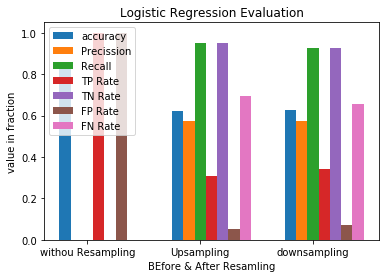

In [89]:
X_axis=n.arange(len(col))
pl.xticks(X_axis,col)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df_LG.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df_LG.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df_LG.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df_LG.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df_LG.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df_LG.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df_LG.iloc[6],width=0.1,label='FN Rate')
pl.title("Logistic Regression Evaluation")
pl.xlabel("BEfore & After Resamling")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

In [90]:
df_DCT['withou Resampling']=lt0
df_DCT['Upsampling']=lt8U
df_DCT['downsampling']=lt8D
print(df_DCT)

            withou Resampling  Upsampling  downsampling
accuracy             0.962333    0.987601      0.956474
Precission           0.892857    0.977734      0.945415
Recall               0.860215    0.997609      0.966518
TP rate              0.981065    0.977838      0.946921
TN rate              0.860215    0.997609      0.966518
FP rate              0.139785    0.002391      0.033482
FN rate              0.018935    0.022162      0.053079


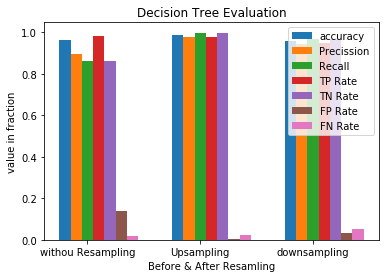

In [91]:
X_axis=n.arange(len(col))
pl.xticks(X_axis,col)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df_DCT.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df_DCT.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df_DCT.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df_DCT.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df_DCT.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df_DCT.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df_DCT.iloc[6],width=0.1,label='FN Rate')
pl.title("Decision Tree Evaluation")
pl.xlabel("Before & After Resamling")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

In [92]:
df_KN['withou Resampling']=ln0
df_KN['Upsampling']=ln8U
df_KN['downsampling']=ln8D
print(df_KN)

            withou Resampling  Upsampling  downsampling
accuracy             0.907333    0.921866      0.893362
Precission           0.960591    0.866667      0.820513
Recall               0.419355    0.994819      1.000000
TP rate              0.996844    0.850700      0.791932
TN rate              0.419355    0.994819      1.000000
FP rate              0.580645    0.005181      0.000000
FN rate              0.003156    0.149300      0.208068


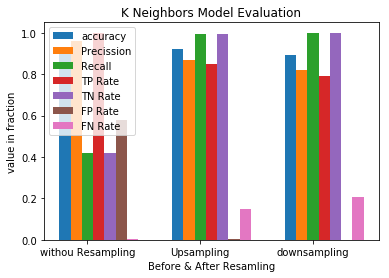

In [93]:
X_axis=n.arange(len(col))
pl.xticks(X_axis,col)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df_KN.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df_KN.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df_KN.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df_KN.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df_KN.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df_KN.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df_KN.iloc[6],width=0.1,label='FN Rate')
pl.title("K Neighbors Model Evaluation")
pl.xlabel("Before & After Resamling")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

In [94]:
df_NB['withou Resampling']=lb0
df_NB['Upsampling']=lb8U
df_NB['downsampling']=lb8D
print(df_NB)

            withou Resampling  Upsampling  downsampling
accuracy             0.943000    0.926786      0.922742
Precission           0.924855    0.894426      0.877756
Recall               0.688172    0.965723      0.977679
TP rate              0.989744    0.888802      0.870488
TN rate              0.688172    0.965723      0.977679
FP rate              0.311828    0.034277      0.022321
FN rate              0.010256    0.111198      0.129512


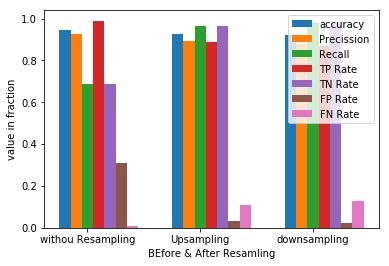

In [95]:
X_axis=n.arange(len(col))
pl.xticks(X_axis,col)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df_NB.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df_NB.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df_NB.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df_NB.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df_NB.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df_NB.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df_NB.iloc[6],width=0.1,label='FN Rate')
pl.xlabel("BEfore & After Resamling")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

# Resampling Result

In [96]:
#As upsampling is giving better result we will proceed furthur with the upsampled data 

y=upsampled['approval']
x=upsampled.drop(['approval'],axis=1)

In [97]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import VotingClassifier as VC
from sklearn.linear_model import LogisticRegression as LG
from sklearn.preprocessing import StandardScaler as SC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GB

## Bagging (Before Select K best)

In [98]:
seed=1
num_trees=100
max_features=3
Kfold=model_selection.KFold(n_splits=10,random_state=seed)
model=RFC(n_estimators=num_trees,max_features=max_features)
results=model_selection.cross_val_score(model,x,y,cv=Kfold)
print(results)
print(results.mean())

[0.99940968 0.99940968 0.99822904 0.99940968 0.99881936 0.97932664
 0.98995865 0.98405198 0.94979327 0.94979327]
0.984820125372131


## Voting (before Select K best)

In [99]:
xv=SC().fit_transform(x)

estimators=[]
model1=LG()
estimators.append(('logistic',model1))
model2=DTC()
estimators.append(('tree',model2))
model3=KNC(n_neighbors=100,p=2,metric='euclidean')
estimators.append(('K neighbor',model3))
model4=GB()
estimators.append(('bayes',model4))


ensemble=VC(estimators)
results=model_selection.cross_val_score(ensemble,x,y,cv=Kfold)
print(results.mean())

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' i

0.6338672120984316


# Select K Best

In [100]:
from sklearn.feature_selection import SelectKBest as skb
from sklearn.feature_selection import chi2,f_classif

In [101]:
best_fit=skb(f_classif,k=5).fit(x,y)

In [102]:
df_scores=p.DataFrame(best_fit.scores_)  #create a fataframe containing the scores of the column
df_columns=p.DataFrame(x.columns)  #create data frame containing all columns

#create a dataframe with al the columns and their scores
feature_scores=p.concat([df_columns,df_scores],axis=1)

#renaming columns of the new dataframe
feature_scores.columns=['features','Scores']

In [103]:
print(feature_scores)

         features        Scores
0     customer_id      0.609832
1      est_income   3454.073142
2        hold_bal    424.019584
3  pref_cust_prob  21099.552761
4      imp_cscore     14.179925
5       RiskScore      0.030026
6      axio_score     10.902447
7          ad exp      0.265098


# k=5

In [104]:
df5=feature_scores.nlargest(5,'Scores')
print(df5)

         features        Scores
3  pref_cust_prob  21099.552761
1      est_income   3454.073142
2        hold_bal    424.019584
4      imp_cscore     14.179925
6      axio_score     10.902447


In [105]:
x=upsampled[df5['features']]
Xtrn,Xtst,Ytrn,Ytst=tts(x,y,test_size=0.3,random_state=1)

## Logisctic Regression

In [106]:
model_l5=LG().fit(Xtrn,Ytrn)
predict_l5=model_l5.predict(Xtst)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
m5L=cm(Ytst,predict_l5)
print(m5L)

lg5=[acc(Ytst,predict_l5)]
lg5.append(prr(Ytst,predict_l5))
lg5.append(rcc(Ytst,predict_l5))
lg5.append(m5L[0][0]/(m5L[0][0]+m5L[0][1])) #TPR
lg5.append(m5L[1][1]/(m5L[1][1]+m5L[1][0])) #TNR
lg5.append(m5L[1][0]/(m5L[1][1]+m5L[1][0])) #FPR
lg5.append(m5L[0][1]/(m5L[0][0]+m5L[0][1])) #FNR

print(acc(Ytst,predict_l5))
MA5=cr(Ytst,predict_l5)
print(MA5)

[[   0 2572]
 [   0 2509]]
0.49380043298563275
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2572
           1       0.49      1.00      0.66      2509

   micro avg       0.49      0.49      0.49      5081
   macro avg       0.25      0.50      0.33      5081
weighted avg       0.24      0.49      0.33      5081



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree

In [108]:
model_t5=dtc(criterion='entropy',random_state=1)
model_t5.fit(Xtrn,Ytrn)
predict_t5=model_t5.predict(Xtst)
m5t=cm(Ytst,predict_t5)
print(m5t)

lt5=[acc(Ytst,predict_t5)]
lt5.append(prr(Ytst,predict_t5))
lt5.append(rcc(Ytst,predict_t5))
lt5.append(m5t[0][0]/(m5t[0][0]+m5t[0][1])) #TPR
lt5.append(m5t[1][1]/(m5t[1][1]+m5t[1][0])) #TNR
lt5.append(m5t[1][0]/(m5t[1][1]+m5t[1][0])) #FPR
lt5.append(m5t[0][1]/(m5t[0][0]+m5t[0][1])) #FNR


print(acc(Ytst,predict_t5))
print(cr(Ytst,predict_t5))

[[2527   45]
 [   6 2503]]
0.9899626057862625
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2572
           1       0.98      1.00      0.99      2509

   micro avg       0.99      0.99      0.99      5081
   macro avg       0.99      0.99      0.99      5081
weighted avg       0.99      0.99      0.99      5081



## K neighbors

In [109]:
Xtrn=SC().fit_transform(Xtrn)
Xtst=SC().fit_transform(Xtst)

model_n5=KNC(n_neighbors=83,p=2,metric='euclidean')
model_n5.fit(Xtrn,Ytrn)
predict_n5=model_n5.predict(Xtst)
m5n=cm(Ytst,predict_n5)
print(m5n)

ln5=[acc(Ytst,predict_n5)]
ln5.append(prr(Ytst,predict_n5))
ln5.append(rcc(Ytst,predict_n5))
ln5.append(m5n[0][0]/(m5n[0][0]+m5n[0][1])) #TPR
ln5.append(m5n[1][1]/(m5n[1][1]+m5n[1][0])) #TNR
ln5.append(m5n[1][0]/(m5n[1][1]+m5n[1][0])) #FPR
ln5.append(m5n[0][1]/(m5n[0][0]+m5n[0][1])) #FNR


print(acc(Ytst,predict_n5))
print(cr(Ytst,predict_n5))

[[2310  262]
 [   8 2501]]
0.9468608541625664
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2572
           1       0.91      1.00      0.95      2509

   micro avg       0.95      0.95      0.95      5081
   macro avg       0.95      0.95      0.95      5081
weighted avg       0.95      0.95      0.95      5081



## Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB as GB
model_b5=GB().fit(Xtrn,Ytrn)
predict_b5=model_b5.predict(Xtst)
m5b=cm(Ytst,predict_b5)
print(m5b)

lb5=[acc(Ytst,predict_b5)]
lb5.append(prr(Ytst,predict_b5))
lb5.append(rcc(Ytst,predict_b5))
lb5.append(m5b[0][0]/(m5b[0][0]+m5b[0][1])) #TPR
lb5.append(m5b[1][1]/(m5b[1][1]+m5b[1][0])) #TNR
lb5.append(m5b[1][0]/(m5b[1][1]+m5b[1][0])) #FPR
lb5.append(m5b[0][1]/(m5b[0][0]+m5b[0][1])) #FNR


print(acc(Ytst,predict_b5))
print(cr(Ytst,predict_b5))

[[2288  284]
 [  86 2423]]
0.9271796890375911
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2572
           1       0.90      0.97      0.93      2509

   micro avg       0.93      0.93      0.93      5081
   macro avg       0.93      0.93      0.93      5081
weighted avg       0.93      0.93      0.93      5081



# k=6

In [111]:
df6=feature_scores.nlargest(6,'Scores')
print(df6)

         features        Scores
3  pref_cust_prob  21099.552761
1      est_income   3454.073142
2        hold_bal    424.019584
4      imp_cscore     14.179925
6      axio_score     10.902447
0     customer_id      0.609832


In [112]:
x=upsampled[df6['features']]
Xtrn,Xtst,Ytrn,Ytst=tts(x,y,test_size=0.3,random_state=1)

## Logisctic Regression

In [113]:
model_l6=LG().fit(Xtrn,Ytrn)
predict_l6=model_l6.predict(Xtst)
m6l=cm(Ytst,predict_l6)
print(m6l)

lg6=[acc(Ytst,predict_l6)]
lg6.append(prr(Ytst,predict_l6))
lg6.append(rcc(Ytst,predict_l6))
lg6.append(m6l[0][0]/(m6l[0][0]+m6l[0][1])) #TPR
lg6.append(m6l[1][1]/(m6l[1][1]+m6l[1][0])) #TNR
lg6.append(m6l[1][0]/(m6l[1][1]+m6l[1][0])) #FPR
lg6.append(m6l[0][1]/(m6l[0][0]+m6l[0][1])) #FNR


print(acc(Ytst,predict_l6))
print(cr(Ytst,predict_l6))

[[ 787 1785]
 [ 130 2379]]
0.6231056878567212
              precision    recall  f1-score   support

           0       0.86      0.31      0.45      2572
           1       0.57      0.95      0.71      2509

   micro avg       0.62      0.62      0.62      5081
   macro avg       0.71      0.63      0.58      5081
weighted avg       0.72      0.62      0.58      5081



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree

In [114]:
model_t6=dtc(criterion='entropy',random_state=1)
model_t6.fit(Xtrn,Ytrn)
predict_t6=model_t6.predict(Xtst)
m6t=cm(Ytst,predict_t6)
print(m6t)

lt6=[acc(Ytst,predict_t6)]
lt6.append(prr(Ytst,predict_t6))
lt6.append(rcc(Ytst,predict_t6))
lt6.append(m6t[0][0]/(m6t[0][0]+m6t[0][1])) #TPR
lt6.append(m6t[1][1]/(m6t[1][1]+m6t[1][0])) #TNR
lt6.append(m6t[1][0]/(m6t[1][1]+m6t[1][0])) #FPR
lt6.append(m6t[0][1]/(m6t[0][0]+m6t[0][1])) #FNR


print(acc(Ytst,predict_t6))
print(cr(Ytst,predict_t6))

[[2521   51]
 [   6 2503]]
0.9887817358787641
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2572
           1       0.98      1.00      0.99      2509

   micro avg       0.99      0.99      0.99      5081
   macro avg       0.99      0.99      0.99      5081
weighted avg       0.99      0.99      0.99      5081



## K neighbors

In [115]:
Xtrn=SC().fit_transform(Xtrn)
Xtst=SC().fit_transform(Xtst)
model_n6=KNC(n_neighbors=83,p=2,metric='euclidean')
model_n6.fit(Xtrn,Ytrn)
predict_n6=model_n6.predict(Xtst)
m6n=cm(Ytst,predict_n6)
print(m6n)

ln6=[acc(Ytst,predict_n6)]
ln6.append(prr(Ytst,predict_n6))
ln6.append(rcc(Ytst,predict_n6))
ln6.append(m6n[0][0]/(m6n[0][0]+m6n[0][1])) #TPR
ln6.append(m6n[1][1]/(m6n[1][1]+m6n[1][0])) #TNR
ln6.append(m6n[1][0]/(m6n[1][1]+m6n[1][0])) #FPR
ln6.append(m6n[0][1]/(m6n[0][0]+m6n[0][1])) #FNR


print(acc(Ytst,predict_n6))
print(cr(Ytst,predict_n6))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[2266  306]
 [  20 2489]]
0.9358394016925802
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2572
           1       0.89      0.99      0.94      2509

   micro avg       0.94      0.94      0.94      5081
   macro avg       0.94      0.94      0.94      5081
weighted avg       0.94      0.94      0.94      5081



## Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB as GB
model_b6=GB().fit(Xtrn,Ytrn)
predict_b6=model_b6.predict(Xtst)
m6b=cm(Ytst,predict_b6)
print(m6b)

lb6=[acc(Ytst,predict_b6)]
lb6.append(prr(Ytst,predict_b6))
lb6.append(rcc(Ytst,predict_b6))
lb6.append(m6b[0][0]/(m6b[0][0]+m6b[0][1])) #TPR
lb6.append(m6b[1][1]/(m6b[1][1]+m6b[1][0])) #TNR
lb6.append(m6b[1][0]/(m6b[1][1]+m6b[1][0])) #FPR
lb6.append(m6b[0][1]/(m6b[0][0]+m6b[0][1])) #FNR


print(acc(Ytst,predict_b6))
print(cr(Ytst,predict_b6))

[[2287  285]
 [  86 2423]]
0.9269828773863412
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2572
           1       0.89      0.97      0.93      2509

   micro avg       0.93      0.93      0.93      5081
   macro avg       0.93      0.93      0.93      5081
weighted avg       0.93      0.93      0.93      5081



## k=7

In [117]:
df7=feature_scores.nlargest(7,'Scores')
print(df7)

x=upsampled[df7['features']]
Xtrn,Xtst,Ytrn,Ytst=tts(x,y,test_size=0.3,random_state=1)

         features        Scores
3  pref_cust_prob  21099.552761
1      est_income   3454.073142
2        hold_bal    424.019584
4      imp_cscore     14.179925
6      axio_score     10.902447
0     customer_id      0.609832
7          ad exp      0.265098


## Logisctic Regression

In [118]:
model_l7=LG().fit(Xtrn,Ytrn)
predict_l7=model_l7.predict(Xtst)
m7l=cm(Ytst,predict_l7)
print(m7l)

lg7=[acc(Ytst,predict_l7)]
lg7.append(prr(Ytst,predict_l7))
lg7.append(rcc(Ytst,predict_l7))
lg7.append(m7l[0][0]/(m7l[0][0]+m7l[0][1])) #TPR
lg7.append(m7l[1][1]/(m7l[1][1]+m7l[1][0])) #TNR
lg7.append(m7l[1][0]/(m7l[1][1]+m7l[1][0])) #FPR
lg7.append(m7l[0][1]/(m7l[0][0]+m7l[0][1])) #FNR


print(acc(Ytst,predict_l7))
print(cr(Ytst,predict_l7))

[[ 787 1785]
 [ 130 2379]]
0.6231056878567212
              precision    recall  f1-score   support

           0       0.86      0.31      0.45      2572
           1       0.57      0.95      0.71      2509

   micro avg       0.62      0.62      0.62      5081
   macro avg       0.71      0.63      0.58      5081
weighted avg       0.72      0.62      0.58      5081



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree

In [119]:
model_t7=dtc(criterion='entropy',random_state=1)
model_t7.fit(Xtrn,Ytrn)
predict_t7=model_t7.predict(Xtst)
m7t=cm(Ytst,predict_t7)
print(m7t)

lt7=[acc(Ytst,predict_t7)]
lt7.append(prr(Ytst,predict_t7))
lt7.append(rcc(Ytst,predict_t7))
lt7.append(m7t[0][0]/(m7t[0][0]+m7t[0][1])) #TPR
lt7.append(m7t[1][1]/(m7t[1][1]+m7t[1][0])) #TNR
lt7.append(m7t[1][0]/(m7t[1][1]+m7t[1][0])) #FPR
lt7.append(m7t[0][1]/(m7t[0][0]+m7t[0][1])) #FNR


print(acc(Ytst,predict_t7))
print(cr(Ytst,predict_t7))

[[2526   46]
 [   6 2503]]
0.9897657941350128
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2572
           1       0.98      1.00      0.99      2509

   micro avg       0.99      0.99      0.99      5081
   macro avg       0.99      0.99      0.99      5081
weighted avg       0.99      0.99      0.99      5081



## K neighbors

In [120]:
Xtrn=SC().fit_transform(Xtrn)
Xtst=SC().fit_transform(Xtst)

model_n7=KNC(n_neighbors=83,p=2,metric='euclidean')
model_n7.fit(Xtrn,Ytrn)
predict_n7=model_n7.predict(Xtst)
m7n=cm(Ytst,predict_n7)
print(m7n)

ln7=[acc(Ytst,predict_n7)]
ln7.append(prr(Ytst,predict_n7))
ln7.append(rcc(Ytst,predict_n7))
ln7.append(m7n[0][0]/(m7n[0][0]+m7n[0][1])) #TPR
ln7.append(m7n[1][1]/(m7n[1][1]+m7n[1][0])) #TNR
ln7.append(m7n[1][0]/(m7n[1][1]+m7n[1][0])) #FPR
ln7.append(m7n[0][1]/(m7n[0][0]+m7n[0][1])) #FNR


print(acc(Ytst,predict_n7))
print(cr(Ytst,predict_n7))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[2201  371]
 [  11 2498]]
0.924817949222594
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2572
           1       0.87      1.00      0.93      2509

   micro avg       0.92      0.92      0.92      5081
   macro avg       0.93      0.93      0.92      5081
weighted avg       0.93      0.92      0.92      5081



# Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB as GB
model_b7=GB().fit(Xtrn,Ytrn)
predict_b7=model_b7.predict(Xtst)
m7b=cm(Ytst,predict_b7)
print(m7b)

lb7=[acc(Ytst,predict_b7)]
lb7.append(prr(Ytst,predict_b7))
lb7.append(rcc(Ytst,predict_b7))
lb7.append(m7b[0][0]/(m7b[0][0]+m7b[0][1])) #TPR
lb7.append(m7b[1][1]/(m7b[1][1]+m7b[1][0])) #TNR
lb7.append(m7b[1][0]/(m7b[1][1]+m7b[1][0])) #FPR
lb7.append(m7b[0][1]/(m7b[0][0]+m7b[0][1])) #FNR


print(acc(Ytst,predict_b7))
print(cr(Ytst,predict_b7))

[[2286  286]
 [  86 2423]]
0.9267860657350915
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2572
           1       0.89      0.97      0.93      2509

   micro avg       0.93      0.93      0.93      5081
   macro avg       0.93      0.93      0.93      5081
weighted avg       0.93      0.93      0.93      5081



# Evaluation Matrics Evaluation

In [122]:
models=['Logistic RG','Decision Tree','K Neighbors','Naive Base']
row=['accuracy','Precission','Recall','TP rate','TN rate','FP rate','FN rate']

df0=p.DataFrame(columns=models,index=row)

edf5=edf6=edf7=df8_U=df8_D=df0

## before resampling

In [123]:
df0['Logistic RG']=lg0
df0['Decision Tree']=lt0
df0['K Neighbors']=ln0
df0['Naive Base']=lb0
print(df0)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy          0.845       0.962333     0.907333    0.943000
Precission        0.000       0.892857     0.960591    0.924855
Recall            0.000       0.860215     0.419355    0.688172
TP rate           1.000       0.981065     0.996844    0.989744
TN rate           0.000       0.860215     0.419355    0.688172
FP rate           1.000       0.139785     0.580645    0.311828
FN rate           0.000       0.018935     0.003156    0.010256


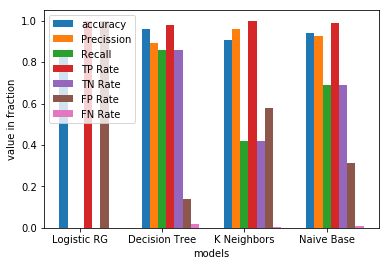

In [124]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df0.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df0.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df0.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df0.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df0.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df0.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df0.iloc[6],width=0.1,label='FN Rate')
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## after resampling (K=8) => All features

## Upsampling

In [125]:
df8_U['Logistic RG']=lg8U
df8_U['Decision Tree']=lt8U
df8_U['K Neighbors']=ln8U
df8_U['Naive Base']=lb8U
print(df8_U)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy       0.623106       0.987601     0.921866    0.926786
Precission     0.571326       0.977734     0.866667    0.894426
Recall         0.948187       0.997609     0.994819    0.965723
TP rate        0.305988       0.977838     0.850700    0.888802
TN rate        0.948187       0.997609     0.994819    0.965723
FP rate        0.051813       0.002391     0.005181    0.034277
FN rate        0.694012       0.022162     0.149300    0.111198


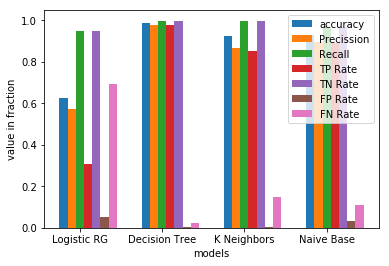

In [126]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df8_U.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df8_U.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df8_U.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df8_U.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df8_U.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df8_U.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df8_U.iloc[6],width=0.1,label='FN Rate')
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## Downsampling

In [127]:
df8_D['Logistic RG']=lg8D
df8_D['Decision Tree']=lt8D
df8_D['K Neighbors']=ln8D
df8_D['Naive Base']=lb8D
print(df8_D)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy       0.628945       0.956474     0.893362    0.922742
Precission     0.573793       0.945415     0.820513    0.877756
Recall         0.928571       0.966518     1.000000    0.977679
TP rate        0.343949       0.946921     0.791932    0.870488
TN rate        0.928571       0.966518     1.000000    0.977679
FP rate        0.071429       0.033482     0.000000    0.022321
FN rate        0.656051       0.053079     0.208068    0.129512


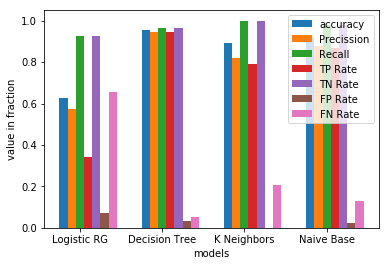

In [128]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,df8_D.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,df8_D.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,df8_D.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,df8_D.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,df8_D.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,df8_D.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,df8_D.iloc[6],width=0.1,label='FN Rate')
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## after resampling (K=5)

In [129]:
edf5['Logistic RG']=lg5
edf5['Decision Tree']=lt5
edf5['K Neighbors']=ln5
edf5['Naive Base']=lb5
print(edf5)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy         0.4938       0.989963     0.946861    0.927180
Precission       0.4938       0.982339     0.905176    0.895087
Recall           1.0000       0.997609     0.996811    0.965723
TP rate          0.0000       0.982504     0.898134    0.889580
TN rate          1.0000       0.997609     0.996811    0.965723
FP rate          0.0000       0.002391     0.003189    0.034277
FN rate          1.0000       0.017496     0.101866    0.110420


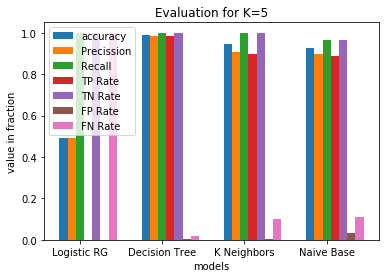

In [130]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,edf5.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,edf5.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,edf5.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,edf5.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,edf5.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,edf5.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,edf5.iloc[6],width=0.1,label='FN Rate')
pl.title("Evaluation for K=5")
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## after resampling (K=6)

In [131]:
edf6['Logistic RG']=lg6
edf6['Decision Tree']=lt6
edf6['K Neighbors']=ln6
edf6['Naive Base']=lb6
print(edf6)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy       0.623106       0.988782     0.935839    0.926983
Precission     0.571326       0.980031     0.890519    0.894756
Recall         0.948187       0.997609     0.992029    0.965723
TP rate        0.305988       0.980171     0.881026    0.889191
TN rate        0.948187       0.997609     0.992029    0.965723
FP rate        0.051813       0.002391     0.007971    0.034277
FN rate        0.694012       0.019829     0.118974    0.110809


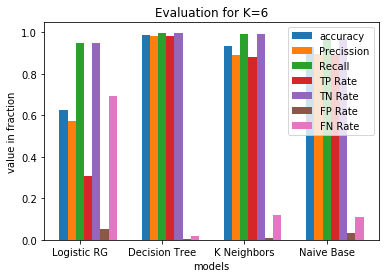

In [132]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,edf6.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,edf6.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,edf6.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,edf6.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,edf6.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,edf6.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,edf6.iloc[6],width=0.1,label='FN Rate')
pl.title("Evaluation for K=6")
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## after resampling (K=7)

In [133]:
edf7['Logistic RG']=lg7
edf7['Decision Tree']=lt7
edf7['K Neighbors']=ln7
edf7['Naive Base']=lb7
print(edf7)

            Logistic RG  Decision Tree  K Neighbors  Naive Base
accuracy       0.623106       0.989766     0.924818    0.926786
Precission     0.571326       0.981954     0.870687    0.894426
Recall         0.948187       0.997609     0.995616    0.965723
TP rate        0.305988       0.982115     0.855754    0.888802
TN rate        0.948187       0.997609     0.995616    0.965723
FP rate        0.051813       0.002391     0.004384    0.034277
FN rate        0.694012       0.017885     0.144246    0.111198


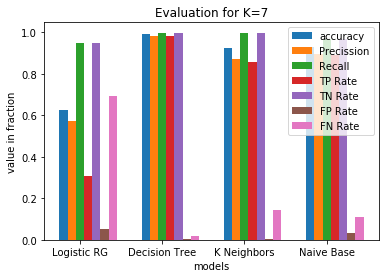

In [134]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,models)

#pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,edf7.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,edf7.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,edf7.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,edf7.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,edf7.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,edf7.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,edf7.iloc[6],width=0.1,label='FN Rate')
pl.title("Evaluation for K=7")
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## Here we can see for all the models, the decision tree is giving better accuracy, recall and precission as weel as proper TPR and TNR 
## so we will take decision tree as our final model and check for which value of k the values are better

In [135]:
evaluation=p.DataFrame(columns=['k=5','k=6','k=7','All Features'],index=row)

evaluation['k=5']=lt5
evaluation['k=6']=lt6
evaluation['k=7']=lt7
evaluation['All Features']=lt8U
print(evaluation)

                 k=5       k=6       k=7  All Features
accuracy    0.989963  0.988782  0.989766      0.987601
Precission  0.982339  0.980031  0.981954      0.977734
Recall      0.997609  0.997609  0.997609      0.997609
TP rate     0.982504  0.980171  0.982115      0.977838
TN rate     0.997609  0.997609  0.997609      0.997609
FP rate     0.002391  0.002391  0.002391      0.002391
FN rate     0.017496  0.019829  0.017885      0.022162


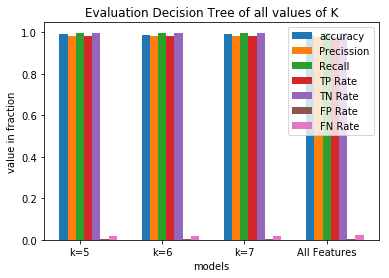

In [136]:
X_axis=n.arange(len(models))
pl.xticks(X_axis,['k=5','k=6','k=7','All Features'])

#fig=pl.figure(figsize=(12,12))
pl.bar(X_axis-.2,evaluation.iloc[0],width=0.1,label='accuracy')
pl.bar(X_axis-.1,evaluation.iloc[1],width=0.1,label='Precission')
pl.bar(X_axis,evaluation.iloc[2],width=0.1,label='Recall')
pl.bar(X_axis+.1,evaluation.iloc[3],width=0.1,label='TP Rate')
pl.bar(X_axis+.2,evaluation.iloc[4],width=0.1,label='TN Rate')
pl.bar(X_axis+.3,evaluation.iloc[5],width=0.1,label='FP Rate')
pl.bar(X_axis+.4,evaluation.iloc[6],width=0.1,label='FN Rate')
pl.title("Evaluation Decision Tree of all values of K")
pl.xlabel("models")
pl.ylabel("value in fraction")

pl.legend()
pl.show()

## as we can see from the data frame that accuracy, precession & recall is best for k=7 as well as good TPR & TNR

## our final model is decision tree with k=5 for k best features selection

# Taking k=5 and preparing input features(x) with 5 features only

In [137]:
x=upsampled[df5['features']]

## Bagging (Random Forest) [k=5]

In [138]:
seed=1
num_trees=100
max_features=3
Kfold=model_selection.KFold(n_splits=10,random_state=seed)
model=RFC(n_estimators=num_trees,max_features=max_features)
results=model_selection.cross_val_score(model,x,y,cv=Kfold)
resultB=results.mean()
print(resultB)

0.986473994243956


## Voting [for k=5]

In [139]:
estimators=[]
model1=LG()
estimators.append(('logistic',model1))
model2=DTC()
estimators.append(('tree',model2))
model3=KNC()
estimators.append(('cneifgbor',model3))
model4=GB()
estimators.append(('bayes',model4))
ensemble=VC(estimators)
results=model_selection.cross_val_score(ensemble,x,y,cv=Kfold)
resultV=results.mean()
print(resultV)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8225149602049135


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [140]:
dff=p.DataFrame(index=['Standalone','bagging','voting'],columns=['accuracy'])
lsf=[edf5.iloc[0]['Decision Tree']]
lsf.append(resultB)
lsf.append(resultV)
dff['accuracy']=lsf

print(dff)

            accuracy
Standalone  0.989766
bagging     0.986474
voting      0.822515
